In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [90]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [128]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))

In [129]:
all_data.shape

(2915, 79)

In [130]:
all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
5             50       RL         85.0    14115   Pave      IR1         Lvl   
6             20       RL         75.0    10084   Pave      Reg         Lvl   
7             60       RL          NaN    10382   Pave      IR1         Lvl   
8             50       RM         51.0     6120   Pave      Reg         Lvl   
9            190       RL         50.0     7420   Pave      Reg         Lvl   
10            20       RL         70.0    11200   Pave      Reg         Lvl   
11            60       RL         85.0    11924   Pave      IR1         Lvl   
12            20       RL          NaN    12968   Pave      IR2         Lvl   
13            20       RL         91.0    10652   Pave      IR1         Lvl   
14            20       RL          NaN    10920   Pave      IR1         Lvl   
15            45       RM         51.0     6120   Pave      Reg         Lvl   
16            20       RL          NaN    11241   Pave      IR1         Lvl   
17            90       RL         72.0    10791   Pave      Reg         Lvl   
18            20       RL         66.0    13695   Pave      Reg         Lvl   
19            20       RL         70.0     7560   Pave      Reg         Lvl   
20            60       RL        101.0    14215   Pave      IR1         Lvl   
21            45       RM         57.0     7449   Pave      Reg         Bnk   
22            20       RL         75.0     9742   Pave      Reg         Lvl   
23           120       RM         44.0     4224   Pave      Reg         Lvl   
24            20       RL          NaN     8246   Pave      IR1         Lvl   
25            20       RL        110.0    14230   Pave      Reg         Lvl   
26            20       RL         60.0     7200   Pave      Reg         Lvl   
27            20       RL         98.0    11478   Pave      Reg         Lvl   
28            20       RL         47.0    16321   Pave      IR1         Lvl   
29            30       RM         60.0     6324   Pave      IR1         Lvl   
30            70  C (all)         50.0     8500   Pave      Reg         Lvl   
31            20       RL          NaN     8544   Pave      IR1         Lvl   
32            20       RL         85.0    11049   Pave      Reg         Lvl   
33            20       RL         70.0    10552   Pave      IR1         Lvl   
34           120       RL         60.0     7313   Pave      Reg         Lvl   
35            60       RL        108.0    13418   Pave      Reg         Lvl   
36            20       RL        112.0    10859   Pave      Reg         Lvl   
37            20       RL         74.0     8532   Pave      Reg         Lvl   
38            20       RL         68.0     7922   Pave      Reg         Lvl   
39            90       RL         65.0     6040   Pave      Reg         Lvl   
40            20       RL         84.0     8658   Pave      Reg         Lvl   
41            20       RL        115.0    16905   Pave      Reg         Lvl   
42            85       RL          NaN     9180   Pave      IR1         Lvl   
43            20       RL          NaN     9200   Pave      IR1         Lvl   
44            20       RL         70.0     7945   Pave      Reg         Lvl   
45           120       RL         61.0     7658   Pave      Reg         Lvl   
46            50       RL         48.0    12822   Pave      IR1         Lvl   
47            20       FV         84.0    11096   Pave      Reg         Lvl   
48           190       RM         33.0     4456   Pave      Reg         Lvl   
49            20       RL         66.0     7742   Pave  

In [82]:
#create train and test sets
from sklearn.model_selection import train_test_split

X = train.drop(['SalePrice','Id'],axis = 1)
y = np.log(train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.2)

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [84]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).drop(['SalePrice','Id'], axis=1).columns
categorical_features = train.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [85]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

lm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearRegression())])

In [86]:
lm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...ssifier', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [87]:
lm.score(X_train, y_train)

0.9288383972716668

In [88]:
lm.score(X_test, y_test)

0.7080048767842451

In [ ]:
grid.score(X_test,y_test)
grid.score(X_train,y_train)

In [ ]:
grid.best_params_
grid.best_score_

In [89]:
train.loc[:,'MSSubClass':'SaleCondition']

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
5             50       RL    14115   Pave      IR1         Lvl    AllPub   
6             20       RL    10084   Pave      Reg         Lvl    AllPub   
7             60       RL    10382   Pave      IR1         Lvl    AllPub   
8             50       RM     6120   Pave      Reg         Lvl    AllPub   
9            190       RL     7420   Pave      Reg         Lvl    AllPub   
10            20       RL    11200   Pave      Reg         Lvl    AllPub   
11            60       RL    11924   Pave      IR1         Lvl    AllPub   
12            20       RL    12968   Pave      IR2         Lvl    AllPub   
13            20       RL    10652   Pave      IR1         Lvl    AllPub   
14            20       RL    10920   Pave      IR1         Lvl    AllPub   
15            45       RM     6120   Pave      Reg         Lvl    AllPub   
16            20       RL    11241   Pave      IR1         Lvl    AllPub   
17            90       RL    10791   Pave      Reg         Lvl    AllPub   
18            20       RL    13695   Pave      Reg         Lvl    AllPub   
19            20       RL     7560   Pave      Reg         Lvl    AllPub   
20            60       RL    14215   Pave      IR1         Lvl    AllPub   
21            45       RM     7449   Pave      Reg         Bnk    AllPub   
22            20       RL     9742   Pave      Reg         Lvl    AllPub   
23           120       RM     4224   Pave      Reg         Lvl    AllPub   
24            20       RL     8246   Pave      IR1         Lvl    AllPub   
25            20       RL    14230   Pave      Reg         Lvl    AllPub   
26            20       RL     7200   Pave      Reg         Lvl    AllPub   
27            20       RL    11478   Pave      Reg         Lvl    AllPub   
28            20       RL    16321   Pave      IR1         Lvl    AllPub   
29            30       RM     6324   Pave      IR1         Lvl    AllPub   
30            70  C (all)     8500   Pave      Reg         Lvl    AllPub   
31            20       RL     8544   Pave      IR1         Lvl    AllPub   
32            20       RL    11049   Pave      Reg         Lvl    AllPub   
33            20       RL    10552   Pave      IR1         Lvl    AllPub   
34           120       RL     7313   Pave      Reg         Lvl    AllPub   
35            60       RL    13418   Pave      Reg         Lvl    AllPub   
36            20       RL    10859   Pave      Reg         Lvl    AllPub   
37            20       RL     8532   Pave      Reg         Lvl    AllPub   
38            20       RL     7922   Pave      Reg         Lvl    AllPub   
39            90       RL     6040   Pave      Reg         Lvl    AllPub   
40            20       RL     8658   Pave      Reg         Lvl    AllPub   
41            20       RL    16905   Pave      Reg         Lvl    AllPub   
42            85       RL     9180   Pave      IR1         Lvl    AllPub   
43            20       RL     9200   Pave      IR1         Lvl    AllPub   
44            20       RL     7945   Pave      Reg         Lvl    AllPub   
45           120       RL     7658   Pave      Reg         Lvl    AllPub   
46            50       RL    12822   Pave      IR1         Lvl    AllPub   
47            20       FV    11096   Pave      Reg         Lvl    AllPub   
48           190       RM     4456   Pave      Reg         Lvl    AllPub   
49            20       RL     7742   Pave      Reg         Lvl    AllPub   
50            60       RL    13869   Pave      IR2         Lvl    AllPub   
51            50       RM     6240   Pave      Reg    

In [92]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd



from scipy.stats import skew

from scipy.special import boxcox1p

from sklearn.feature_selection import RFECV

from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score

In [93]:
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]



all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],

                      test.loc[:,'MSSubClass':'SaleCondition']))



# drop some features to avoid multicollinearity

all_data.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis=1, inplace=True)



train["SalePrice"] = np.log1p(train["SalePrice"])



numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index



skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.65]

skewed_feats = skewed_feats.index



all_data[skewed_feats] = boxcox1p(all_data[skewed_feats], 0.15)



all_data = pd.get_dummies(all_data)



all_data = all_data.fillna(all_data.mean())



X_train = all_data[:train.shape[0]]

X_test = all_data[train.shape[0]:]

y = train.SalePrice





#### models selection

lasso = Lasso(alpha=0.0004)

model = lasso



### prediction

model.fit(X_train, y)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
model.score(X_train, y)

0.895807143952833

In [96]:
#create train and test sets
from sklearn.model_selection import train_test_split

X = all_data[:train.shape[0]]

y = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.2)

In [97]:
model.fit(X_train, y_train)

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
model.score(X_train,y_train)

0.8970843206658313

In [99]:
model.score(X_test,y_test)

0.9007871318422631

(array([  5.,   5.,  17.,  96., 283., 461., 346., 172.,  59.,  12.]),
 array([1.23514768, 1.24147309, 1.24779849, 1.2541239 , 1.26044931,
        1.26677472, 1.27310012, 1.27942553, 1.28575094, 1.29207634,
        1.29840175]),
 <a list of 10 Patch objects>)

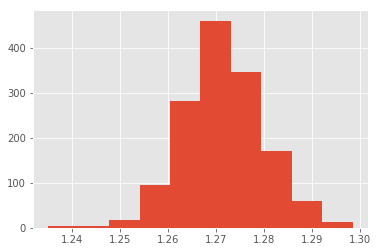

In [103]:
plt.hist(np.log1p(train["SalePrice"]))

In [106]:
train[numeric_feats].apply(lambda x: skew(x.dropna()))

MSSubClass        1.404916
LotFrontage       1.534509
LotArea          12.574590
OverallQual       0.183681
OverallCond       0.689919
YearBuilt        -0.609458
YearRemodAdd     -0.499316
MasVnrArea        2.646242
BsmtFinSF1        0.744088
BsmtFinSF2        4.244209
BsmtUnfSF         0.920809
TotalBsmtSF       0.485894
2ndFlrSF          0.777065
LowQualFinSF      8.989291
GrLivArea         0.834332
BsmtFullBath      0.590543
BsmtHalfBath      4.124712
FullBath          0.017675
HalfBath          0.683518
BedroomAbvGr      0.214845
KitchenAbvGr      4.476748
Fireplaces        0.632026
GarageYrBlt      -0.645116
GarageCars       -0.343121
WoodDeckSF        1.549672
OpenPorchSF       2.337435
EnclosedPorch     3.081275
3SsnPorch        10.279262
ScreenPorch       4.111400
PoolArea         17.504556
MiscVal          24.418175
MoSold            0.217659
YrSold            0.093118
dtype: float64

In [115]:
skew(train.LotArea)

12.574589805730213

In [123]:
boxcox1p(skew(train.ScreenPorch),.15)

1.8484326910040287

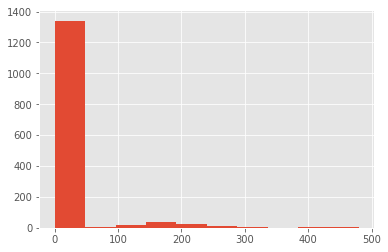

In [124]:
train.ScreenPorch.hist()

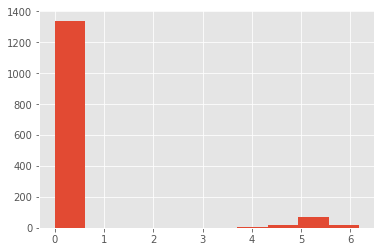

In [125]:
boxcox1p((train.ScreenPorch),0).hist()

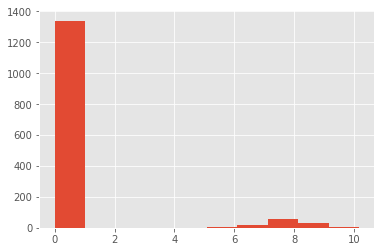

In [126]:
boxcox1p((train.ScreenPorch),.15).hist()

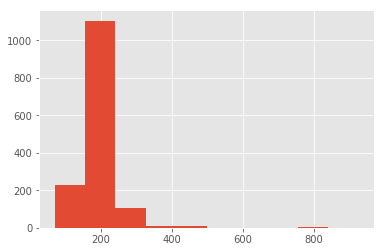

In [118]:
boxcox1p((train.LotArea),.5).hist()

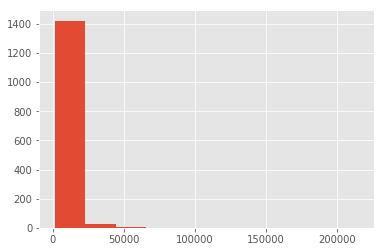

In [119]:
boxcox1p((train.LotArea),1).hist()

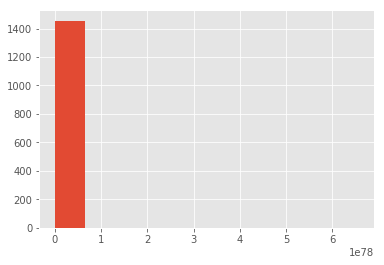

In [120]:
boxcox1p((train.LotArea),15).hist()

In [127]:
all_data[skewed_feats]

MSSubClass  LotFrontage    LotArea  OverallCond  MasVnrArea  BsmtFinSF1  \
0       5.684507     5.831328  19.212182     2.055642    8.059126   11.170327   
1       3.858807     6.221214  19.712205     2.602594    0.000000   12.062832   
2       5.684507     5.914940  20.347241     2.055642    7.646538   10.200343   
3       5.968981     5.684507  19.691553     2.055642    0.000000    8.274266   
4       5.684507     6.314735  21.325160     2.055642    9.391827   10.971129   
5       5.357203     6.337529  21.282283     2.055642    0.000000   11.267217   
6       3.858807     6.098626  19.907529     2.055642    7.944503   13.031093   
7       5.684507     5.857662  20.023862     2.259674    8.511220   11.702249   
8       5.357203     5.392276  17.989871     2.055642    0.000000    0.000000   
9       7.990963     5.357203  18.712544     2.259674    0.000000   11.676516   
10      3.858807     5.968981  20.329199     2.055642    0.000000   11.849447   
11      5.684507     6.337529  20.584023     2.055642    8.914179   12.119733   
12      3.858807     5.857662  20.929243     2.259674    0.000000   11.285513   
13      3.858807     6.469750  20.126838     2.055642    9.072419    0.000000   
14      3.858807     5.857662  20.226881     2.055642    8.232627   11.270884   
15      5.172535     5.392276  17.989871     2.602594    0.000000    0.000000   
16      3.858807     5.857662  20.343998     2.440268    7.873203   10.643870   
17      6.448232     6.021742  20.178990     2.055642    0.000000    0.000000   
18      3.858807     5.859551  21.155939     2.055642    0.000000   10.934619   
19      3.858807     5.968981  18.783793     2.259674    0.000000   10.292420   
20      5.684507     6.674652  21.311893     2.055642    9.590598    0.000000   
21      5.172535     5.591427  18.727396     2.440268    0.000000    0.000000   
22      3.858807     6.098626  19.770362     2.055642    8.873158    0.000000   
23      7.020909     5.133567  16.656244     2.440268    0.000000   11.640795   
24      3.858807     5.857662  19.117502     2.602594    0.000000    7.967837   
25      3.858807     6.844946  21.316319     2.055642   10.910038    0.000000   
26      3.858807     5.684507  18.598238     2.440268    0.000000    8.453930   
27      3.858807     6.615044  20.428657     2.055642    8.103594   12.689052   
28      3.858807     5.248357  21.897710     2.259674    0.000000   12.826768   
29      4.492018     5.684507  18.111423     2.259674    0.000000    0.000000   
30      5.968981     5.357203  19.235091     1.820334    0.000000    0.000000   
31      3.858807     5.857662  19.255157     2.259674    0.000000    0.000000   
32      3.858807     6.337529  20.274294     2.055642    0.000000    0.000000   
33      3.858807     5.968981  20.088960     2.055642    0.000000   12.175675   
34      7.020909     5.684507  18.657315     2.055642    8.567310   12.530609   
35      5.684507     6.808145  21.070798     2.055642    7.216434    0.000000   
36      3.858807     6.881187  20.204295     2.055642    0.000000    0.000000   
37      3.858807     6.073289  19.249693     2.259674   10.950899   12.677122   
38      3.858807     5.914940  18.962955     2.440268    0.000000   11.263544   
39      6.448232     5.831328  17.941262     2.055642    0.000000    0.000000   
40      3.858807     6.314735  19.306739     2.055642    6.674652   10.922352   
41      3.858807     6.934540  22.048733     2.259674    0.000000   12.031113   
42      6.337529     5.857662  19.535804     2.440268    0.000000   11.321793   
43      3.858807     5.857662  19.544358     2.259674    0.000000    8.864879   
44      3.858807     5.968981  18.974101     2.259674    0.000000    7.861125   
45      7.020909     5.714669  18.833003     2.055642    9.788461   10.040245   
46      5.357203     5.285266  20.882419     2.055642    0.000000   12.992054   
47      3.858807     6.314735  20.291452     2.055642    0.000000    4.137711   
48      7.990963     4.647709  16.844